<a href="https://colab.research.google.com/github/nitink099/2048---Game/blob/main/Visionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependencies


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [ ]:

# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


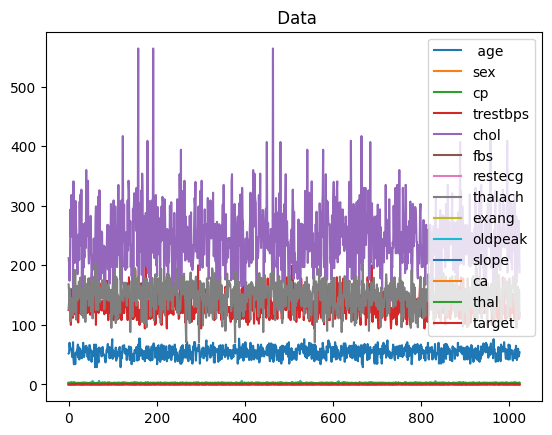

In [ ]:
# Plot the data
heart_data.plot()
plt.title(' Data')
plt.show()

In [ ]:
# number of rows and columns in the dataset
heart_data.shape
print(heart_data.shape)

(1025, 14)


In [ ]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,526
0,499


1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target


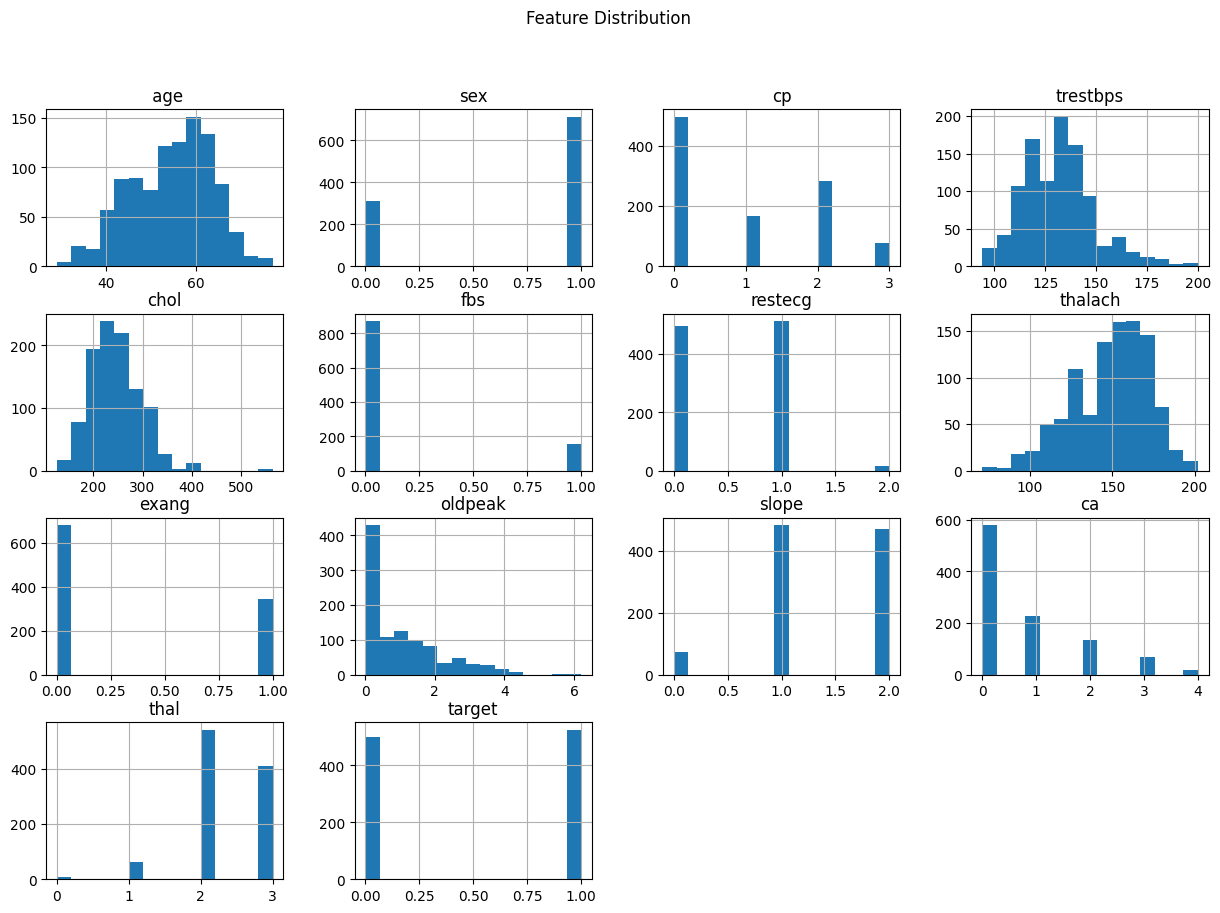

In [ ]:

# Plotting a histogram for each feature
heart_data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distribution')
plt.show()




In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0       52    1   0       125   212    0        1      168      0      1.0   
1       53    1   0       140   203    1        0      155      1      3.1   
2       70    1   0       145   174    0        1      125      1      2.6   
3       61    1   0       148   203    0        1      161      0      0.0   
4       62    0   0       138   294    1        1      106      0      1.9   
...    ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020    59    1   1       140   221    0        1      164      1      0.0   
1021    60    1   0       125   258    0        0      141      1      2.8   
1022    47    1   0       110   275    0        0      118      1      1.0   
1023    50    0   0       110   254    0        0      159      0      0.0   
1024    54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training



Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8524390243902439


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8048780487804879


Building a Predictive System

In [ ]:
input_data = (34,0,1,118,210,0,1,192,0,0.7,2,0,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
!pip install gradio
import gradio as gr

In [ ]:
# Gradio Interface Function
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    input_data = (age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    prediction = model.predict(input_data_reshaped)

    if prediction[0] == 0:
        return "The Person does not have Heart Disease"
    else:
        return "The Person has Heart Disease"


In [ ]:

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_heart_disease,
   inputs=[
        gr.Number(label="Age"),
        gr.Radio(label="Sex (1 = Male, 0 = Female)", choices=[1, 0]),
        gr.Radio(label="Chest Pain Type (0 = Typical angina, 1 = Atypical angina, 2 = Non-anginal pain, 3 = Asymptomatic)", choices=[0, 1, 2, 3]),
        gr.Number(label="Resting Blood Pressure (trestbps)"),
        gr.Number(label="Serum Cholestoral in mg/dl (chol)"),
        gr.Radio(label="Fasting Blood Sugar > 120 mg/dl (1 = True; 0 = False)", choices=[1, 0]),
        gr.Radio(label="Resting ECG results (0 = Normal, 1 = Having ST-T wave abnormality, 2 = Showing probable or definite left ventricular hypertrophy)", choices=[0, 1, 2]),
        gr.Number(label="Maximum Heart Rate Achieved (thalach)"),
        gr.Radio(label="Exercise Induced Angina (1 = Yes, 0 = No)", choices=[1, 0]),
        gr.Number(label="Oldpeak"),
        gr.Radio(label="Slope of the Peak Exercise ST segment (0 = Upsloping, 1 = Flat, 2 = Downsloping)", choices=[0, 1, 2]),
        gr.Number(label="Number of Major Vessels (ca) colored by fluoroscopy"),
        gr.Radio(label="Thal (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect)", choices=[1, 2, 3])
    ],
    outputs="text",
    title="Heart Disease Prediction",
    description="Enter the values for the following medical attributes to predict the likelihood of heart disease."
)

# Launch the Gradio interface
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9a4400c94187e8e1b8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
